## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df['ASK_AMT']

0            5000
1          108590
2            5000
3            6692
4          142590
           ...   
34294        5000
34295        5000
34296        5000
34297        5000
34298    36500179
Name: ASK_AMT, Length: 34299, dtype: int64

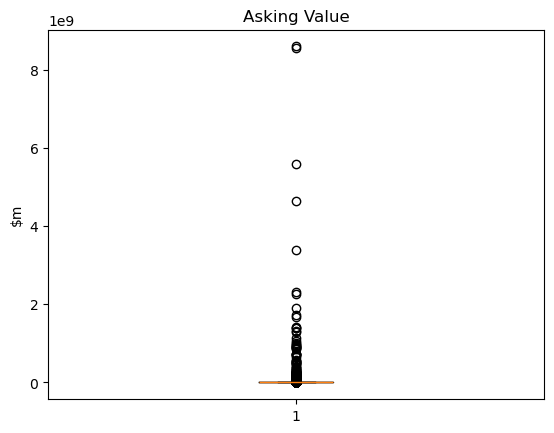

In [7]:
# Dependencies
import numpy as np
import matplotlib.pyplot as plt

# Example outlier plot of asking amount
ask_value = application_df['ASK_AMT']
fig1, ax1 = plt.subplots()
ax1.set_title('Asking Value')
ax1.set_ylabel('$m')
ax1.boxplot(ask_value)
plt.show()

In [8]:
# Determine which data points are outside of the 1.5*IQR range
quartiles = np.quantile(ask_value,[.25,.75])
iqr = quartiles[1]-quartiles[0]
lower_bound = quartiles[0]-(1.5*iqr)
upper_bound = quartiles[1]+(1.5*iqr)

potential_outliers = [amt for amt in ask_value if amt < lower_bound or amt > upper_bound]
potential_outliers
print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

Lower Bound: 887.0, Upper Bound: 11855.0


In [9]:
# Chose outlier values of Lower Bound: 887.0, Upper Bound: 11855.0  and remove outliers
# use the variable name `asking_to_remove`
application_df_cleaned = application_df[(application_df['ASK_AMT'] >= 887) & (application_df['ASK_AMT'] <= 11855)]

# Sort the DataFrame by ASK_AMT
application_df_cleaned = application_df_cleaned.sort_values(by='ASK_AMT')

# Remove in dataframe
application_df_cleaned.reset_index(drop=True, inplace=True)

# Check to make sure removal was successful
application_df_cleaned['ASK_AMT']

0         5000
1         5000
2         5000
3         5000
4         5000
         ...  
26088    11839
26089    11839
26090    11841
26091    11847
26092    11854
Name: ASK_AMT, Length: 26093, dtype: int64

In [10]:
# Look at INCOME AMOUNT value counts to identify and replace with "Other"
count_inc_types = application_df_cleaned['INCOME_AMT'].value_counts()
print(count_inc_types)

INCOME_AMT
0                24332
25000-99999        657
1-9999             504
100000-499999      317
10000-24999        261
1M-5M               15
50M+                 3
10M-50M              2
5M-10M               2
Name: count, dtype: int64


In [11]:
# Chose a cutoff value of 500 and create a list of income amts to be replaced
# use the variable name `incomes_to_replace`
incomes_to_replace = count_inc_types[count_inc_types < 500].index.tolist()

# Replace in dataframe
for inc in incomes_to_replace:
    application_df_cleaned['INCOME_AMT'] = application_df_cleaned['INCOME_AMT'].replace(inc,"Other")

# Check to make sure replacement was successful
application_df_cleaned['INCOME_AMT'].value_counts()

INCOME_AMT
0              24332
25000-99999      657
Other            600
1-9999           504
Name: count, dtype: int64

In [12]:
# Determine the number of unique values in each column.
application_df_cleaned.nunique()

APPLICATION_TYPE           12
AFFILIATION                 6
CLASSIFICATION             65
USE_CASE                    5
ORGANIZATION                4
STATUS                      2
INCOME_AMT                  4
SPECIAL_CONSIDERATIONS      2
ASK_AMT                   656
IS_SUCCESSFUL               2
dtype: int64

In [13]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
count_app_types = application_df_cleaned['APPLICATION_TYPE'].value_counts()
count_app_types

APPLICATION_TYPE
T3     20086
T4      1331
T19      999
T5       894
T6       882
T8       669
T7       633
T10      508
T13       54
T9        18
T12       13
T2         6
Name: count, dtype: int64

In [14]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff = 1000
application_types_to_replace = count_app_types[count_app_types <= cutoff].index.tolist()
print(application_types_to_replace)

# Replace in dataframe
for app in application_types_to_replace:
    application_df_cleaned['APPLICATION_TYPE'] = application_df_cleaned['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df_cleaned['APPLICATION_TYPE'].value_counts()

['T19', 'T5', 'T6', 'T8', 'T7', 'T10', 'T13', 'T9', 'T12', 'T2']


APPLICATION_TYPE
T3       20086
Other     4676
T4        1331
Name: count, dtype: int64

In [15]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
count_class_types = application_df_cleaned['CLASSIFICATION'].value_counts()
print(count_class_types)

CLASSIFICATION
C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
         ...  
C1236        1
C2190        1
C1570        1
C2500        1
C1245        1
Name: count, Length: 65, dtype: int64


In [16]:
# You may find it helpful to look at CLASSIFICATION value counts >1

cg_one = count_class_types[count_class_types >1]
cg_one

CLASSIFICATION
C1000    12557
C2000     4693
C1200     3997
C2100     1623
C3000     1537
C7000      546
C1700      223
C4000      129
C5000      106
C1270       89
C2700       75
C7100       62
C2800       61
C1280       46
C1300       42
C1230       35
C2300       28
C1240       28
C1400       27
C7200       20
C6000       14
C8000       13
C1250       13
C7120       11
C1278       10
C1235        9
C1238        9
C8200        9
C1237        9
C1500        7
C1720        6
C7210        5
C1257        5
C2400        4
C1600        4
C4100        4
C1800        3
C1260        3
C1246        2
C0           2
C1256        2
C1267        2
Name: count, dtype: int64

In [17]:
# Chose a cutoff value of 1000 and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = count_class_types[count_class_types < 1000].index.tolist()

# Replace in dataframe
for cls in classifications_to_replace:
    application_df_cleaned['CLASSIFICATION'] = application_df_cleaned['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df_cleaned['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    12557
C2000     4693
C1200     3997
Other     1686
C2100     1623
C3000     1537
Name: count, dtype: int64

In [18]:
# Convert categorical data to numeric with `pd.get_dummies`
conv_app_df = pd.get_dummies(application_df_cleaned, dtype=int)
conv_app_df

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,AFFILIATION_Independent,AFFILIATION_National,...,ORGANIZATION_Association,ORGANIZATION_Co-operative,ORGANIZATION_Corporation,ORGANIZATION_Trust,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_25000-99999,INCOME_AMT_Other,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,1,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
1,1,5000,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
2,1,5000,1,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
3,1,5000,1,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,1,5000,1,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26088,1,11839,1,0,1,0,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
26089,1,11839,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
26090,1,11841,1,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0
26091,1,11847,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [19]:
# Split our preprocessed data into our features and target arrays
y = conv_app_df["IS_SUCCESSFUL"].values

X = conv_app_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


In [20]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Model Optimised #1
- After running a keras tuner of the best 3 models (see code below) and using the hyperparameters of the best model which scored a 0.7506 accuracy, I've retrained the best model here using these hyperparameters of the best model from the Keras Tuner.
- Removing outliers
- Increasing neuron units in third hidden layer to 20
- Binning income amounts < 500 which are considered rare occurances
- Changed activation function of layers to tanh

In [21]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
print(number_input_features)
# number of neurons in each layer of the best hyperparameters from the Keras Tuner
hidden_nodes_layer1 = 36
hidden_nodes_layer2 = 66
hidden_nodes_layer3 = 56
hidden_nodes_layer4 = 11
hidden_nodes_layer5 = 41

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="tanh"))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

32


c:\ProgramData\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 36)             │         1,188 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 66)             │         2,442 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 56)             │         3,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │           627 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 41)             │           492 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            42 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,543 (33.37 KB)

 Trainable params: 8,543 (33.37 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=200)

Epoch 1/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7393 - loss: 0.5381
Epoch 2/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7411 - loss: 0.5416
Epoch 3/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7427 - loss: 0.5370
Epoch 4/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 476us/step - accuracy: 0.7427 - loss: 0.5386
Epoch 5/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step - accuracy: 0.7438 - loss: 0.5376
Epoch 6/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 463us/step - accuracy: 0.7403 - loss: 0.5423
Epoch 7/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7432 - loss: 0.5384
Epoch 8/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7410 - loss: 0.5378
Epoch 9/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 457us/step - accuracy: 0.7370 - loss: 0.5414
Epoch 10/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 471us/step - accuracy: 0.7471 - loss: 0.5325
Epoch 11/200
612/612 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.7409 - loss: 0.5426
Epoch 12/200
612/61

In [213]:
print(X_test_scaled.shape)
print(y_test.shape)   

(6524, 32)
(6524,)


In [25]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - 824us/step - accuracy: 0.7446 - loss: 0.5524
Loss: 0.5524214506149292, Accuracy: 0.7446351647377014


In [215]:
# Export our model to HDF5 file
nn.save('AlphabetSoupCharity.keras')

## Best 3 models using Keras Tuner

In [217]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh', 'sigmoid'])

    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=80,
        step=5), activation=activation, input_dim=number_input_features))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=90,
            step=5),
            activation=activation))

    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

    return nn_model

In [218]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=50,
    hyperband_iterations=3)

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [219]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 270 Complete [00h 00m 21s]
val_accuracy: 0.7487737536430359

Best val_accuracy So Far: 0.7506130933761597
Total elapsed time: 00h 30m 55s


In [220]:
# Get top 3 model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 6, 'num_layers': 3, 'units_0': 66, 'units_1': 71, 'units_2': 56, 'units_3': 26, 'units_4': 26, 'units_5': 6, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 3, 'tuner/round': 3, 'tuner/trial_id': '0139'}
{'activation': 'tanh', 'first_units': 36, 'num_layers': 5, 'units_0': 51, 'units_1': 66, 'units_2': 56, 'units_3': 11, 'units_4': 41, 'units_5': 51, 'tuner/epochs': 50, 'tuner/initial_epoch': 17, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0081'}
{'activation': 'tanh', 'first_units': 71, 'num_layers': 3, 'units_0': 41, 'units_1': 21, 'units_2': 81, 'units_3': 51, 'units_4': 21, 'units_5': 71, 'tuner/epochs': 6, 'tuner/initial_epoch': 2, 'tuner/bracket': 3, 'tuner/round': 1, 'tuner/trial_id': '0195'}


In [221]:
# Evaluate the top 3 models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - 1ms/step - accuracy: 0.7506 - loss: 0.5380
Loss: 0.5379769206047058, Accuracy: 0.7506130933761597
204/204 - 0s - 1ms/step - accuracy: 0.7500 - loss: 0.5380
Loss: 0.5379793047904968, Accuracy: 0.75
204/204 - 0s - 1ms/step - accuracy: 0.7497 - loss: 0.5464
Loss: 0.5463905930519104, Accuracy: 0.7496934533119202


In [222]:
# Compare the performance to the second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

204/204 - 0s - 1ms/step - accuracy: 0.7500 - loss: 0.5380
Loss: 0.5379793047904968, Accuracy: 0.75
